<a href="https://colab.research.google.com/github/kumarmanketeng/Linear-Regression-/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@article{madewithml,
    author       = {Goku Mohandas},
    title        = { Notebooks - Made With ML },
    howpublished = {\url{https://madewithml.com/}},
    year         = {2021}
}

In [2]:
# float variable
x = 5.0
print (x, type(x))

5.0 <class 'float'>


In [5]:
x=4
if x==4:
  score='low'
elif x==3:
  score='high'
else:
  score='medium'
print(score)

low


In [6]:
veggies = ["carrots", "broccoli", "beans"]
for veggie in veggies:
    if veggie == "broccoli":
        break
    print (veggie)

carrots


In [7]:
# `continue` to the next iteration
veggies = ["carrots", "broccoli", "beans"]
for veggie in veggies:
    if veggie == "broccoli":
        continue
    print (veggie)

carrots
beans


In [10]:
import numpy as np
import pandas as pd

In [9]:
# Set seed for reproducibility
np.random.seed(seed=1234)

In [11]:
url = "https://raw.githubusercontent.com/GokuMohandas/MadeWithML/main/datasets/titanic.csv"
df = pd.read_csv(url, header=0)

In [12]:
df.head(3)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0


In [13]:
import matplotlib.pyplot as plt

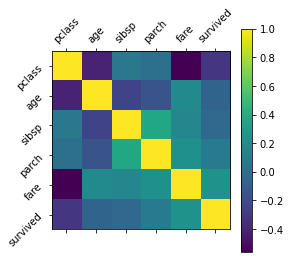

In [14]:
plt.matshow(df.corr())
continuous_features = df.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation='45')
plt.yticks(range(len(continuous_features)), continuous_features, rotation='45')
plt.colorbar()
plt.show()

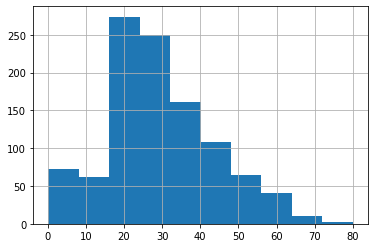

In [15]:
df['age'].hist()

In [16]:
df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [17]:
df['name'].head()

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object

In [18]:
# Filtering
df[df['sex']=='female'].head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1


In [19]:
# Sorting
df.sort_values('age', ascending=False).head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
14,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1
61,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,1
1235,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0
135,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0


In [20]:
import numpy as np
import torch


In [21]:
SEED = 1234

In [22]:
# Set seed for reproducibility
np.random.seed(seed=SEED)
torch.manual_seed(SEED)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
SEED = 1234
NUM_SAMPLES = 50

In [25]:
np.random.seed(SEED)

In [26]:
def generate_data(num_samples):
    """Generate dummy data for linear regression."""
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10,20,size=num_samples)
    y = 3.5*X + random_noise # add some noise
    return X, y

In [27]:
# Generate random (linear) data
X, y = generate_data(num_samples=NUM_SAMPLES)
data = np.vstack([X, y]).T
print (data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.16326313]
 [ 2.         10.13183217]
 [ 3.         24.06075751]
 [ 4.         27.39927424]]


In [28]:
# Load into a Pandas DataFrame
df = pd.DataFrame(data, columns=['X', 'y'])
X = df[['X']].values
y = df[['y']].values
df.head()

,X,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


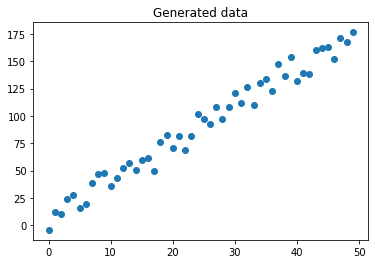

In [30]:
# Scatter plot
plt.title("Generated data")
plt.scatter(x=df['X'], y=df['y'])
plt.show()

In [31]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [32]:
# Shuffle data
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [33]:
# Split indices
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [34]:
# Split data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


In [35]:
def standardize_data(data, mean, std):
    return (data - mean)/std

In [36]:
# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [37]:
# Standardize
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [38]:
# Check (means should be ~0 and std should be ~1)
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.6, std: 0.9
mean: -0.6, std: 0.9


In [39]:
INPUT_DIM = X_train.shape[1] # X is 1-dimensional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional

In [40]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, 1))
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


In [41]:
# Forward pass [NX1] · [1X1] = [NX1]
y_pred = np.dot(X_train, W) + b
print (f"y_pred: {y_pred.shape}")

y_pred: (35, 1)


In [42]:
# Loss
N = len(y_train)
loss = (1/N) * np.sum((y_train - y_pred)**2)
print (f"loss: {loss:.2f}")

loss: 0.99


In [43]:
# Backpropagation
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

In [44]:
LEARNING_RATE = 1e-1

In [45]:
# Update weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

In [46]:
NUM_EPOCHS = 100

In [47]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, ))

# Training loop
for epoch_num in range(NUM_EPOCHS):

    # Forward pass [NX1] · [1X1] = [NX1]
    y_pred = np.dot(X_train, W) + b

    # Loss
    loss = (1/len(y_train)) * np.sum((y_train - y_pred)**2)

    # Show progress
    if epoch_num%10 == 0:
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

    # Backpropagation
    dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
    db = -(2/N) * np.sum((y_train - y_pred) * 1)

    # Update weights
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * db

Epoch: 0, loss: 0.990
Epoch: 10, loss: 0.039
Epoch: 20, loss: 0.028
Epoch: 30, loss: 0.028
Epoch: 40, loss: 0.028
Epoch: 50, loss: 0.028
Epoch: 60, loss: 0.028
Epoch: 70, loss: 0.028
Epoch: 80, loss: 0.028
Epoch: 90, loss: 0.028


In [48]:
# Predictions
pred_train = W*X_train + b
pred_test = W*X_test + b

In [49]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.03, test_MSE: 0.01


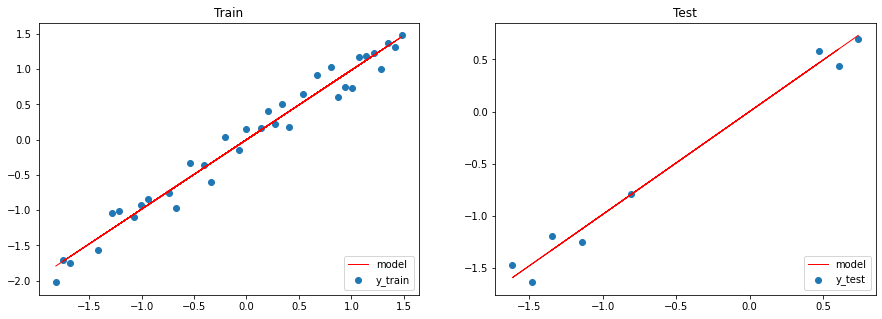

In [50]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label='y_train')
plt.plot(X_train, pred_train, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Show plots
plt.show()

In [51]:
# Unscaled weights
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*X_mean)
print ("[actual] y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.1f}X + {b_unscaled[0]:.1f}")

[actual] y = 3.5X + noise
[model] y_hat = 3.4X + 7.8


In [52]:
import torch

In [53]:
# Set seed for reproducibility
torch.manual_seed(SEED)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [56]:
# Split (train)
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE)

In [57]:
print (f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n"
       f"remaining: {len(X_)} ({(len(X_) / len(X)):.2f})")

train: 35 (0.70)
remaining: 15 (0.30)


In [58]:
# Split (test)
X_val, X_test, y_val, y_test = train_test_split(
    X_, y_, train_size=0.5)

In [59]:
print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")

train: 35 (0.70)
val: 7 (0.14)
test: 8 (0.16)


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [62]:
# Apply scaler on training and test data
X_train = X_scaler.transform(X_train)
y_train = y_scaler.transform(y_train).ravel().reshape(-1, 1)
X_val = X_scaler.transform(X_val)
y_val = y_scaler.transform(y_val).ravel().reshape(-1, 1)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test).ravel().reshape(-1, 1)

In [63]:
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.5, std: 0.8
mean: -0.5, std: 0.8


In [64]:
from torch import nn

In [65]:
# Inputs
N = 3 # num samples
x = torch.randn(N, INPUT_DIM)
print (x.shape)
print (x.numpy())

torch.Size([3, 1])
[[ 0.04613046]
 [ 0.40240282]
 [-1.0115291 ]]


In [66]:
# Weights
m = nn.Linear(INPUT_DIM, OUTPUT_DIM)
print (m)
print (f"weights ({m.weight.shape}): {m.weight[0][0]}")
print (f"bias ({m.bias.shape}): {m.bias[0]}")

Linear(in_features=1, out_features=1, bias=True)
weights (torch.Size([1, 1])): 0.34761226177215576
bias (torch.Size([1])): -0.3370760679244995


In [67]:
# Forward pass
z = m(x)
print (z.shape)
print (z.detach().numpy())

torch.Size([3, 1])
[[-0.32104054]
 [-0.19719592]
 [-0.68869597]]


In [68]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(input_dim, output_dim)

    def forward(self, x_in):
        y_pred = self.fc1(x_in)
        return y_pred

In [69]:
# Initialize model
model = LinearRegression(input_dim=INPUT_DIM, output_dim=OUTPUT_DIM)
print (model.named_parameters)

<bound method Module.named_parameters of LinearRegression(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)>


In [70]:
loss_fn = nn.MSELoss()
y_pred = torch.Tensor([0., 0., 1., 1.])
y_true =  torch.Tensor([1., 1., 1., 0.])
loss = loss_fn(y_pred, y_true)
print('Loss: ', loss.numpy())

Loss:  0.75


In [71]:
from torch.optim import Adam

In [72]:
# Optimizer
optimizer = Adam(model.parameters(), lr=LEARNING_RATE)

In [73]:
# Convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

In [74]:
# Training
for epoch in range(NUM_EPOCHS):
    # Forward pass
    y_pred = model(X_train)

    # Loss
    loss = loss_fn(y_pred, y_train)

    # Zero all gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if epoch%20==0:
        print (f"Epoch: {epoch} | loss: {loss:.2f}")

Epoch: 0 | loss: 0.22
Epoch: 20 | loss: 0.03
Epoch: 40 | loss: 0.02
Epoch: 60 | loss: 0.02
Epoch: 80 | loss: 0.02


In [75]:
# Predictions
pred_train = model(X_train)
pred_test = model(X_test)

In [76]:
# Performance
train_error = loss_fn(pred_train, y_train)
test_error = loss_fn(pred_test, y_test)
print(f'train_error: {train_error:.2f}')
print(f'test_error: {test_error:.2f}')

train_error: 0.02
test_error: 0.01


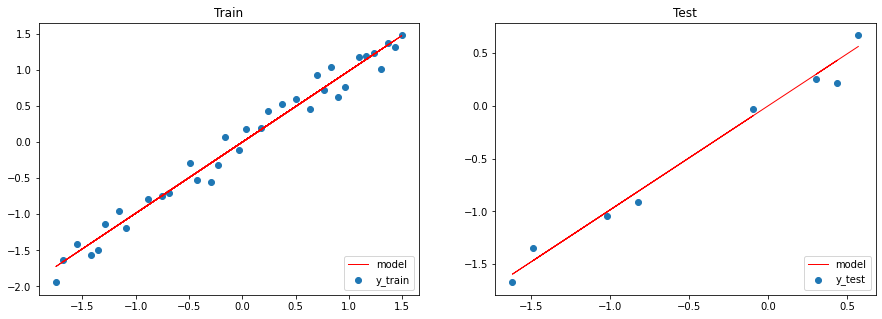

In [77]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label='y_train')
plt.plot(X_train, pred_train.detach().numpy(), color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test.detach().numpy(), color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Show plots
plt.show()